# 가설검정 전에 알아야 하는 것 - 정규분포, 중심극한정리

## contents
- 1. 평균차이별 정규분폰
- 2. 분산차이별 정규분포
- 3. 표준편차 구간
- 4. 표준정규분포
- 5. 중심극한 정리
    - 5-1. 샘플의 개수 4, 반복 횟수 증가에 따른 표본평균의 분포 변화 
    - 5-2. 샘플수 증가에 따른 표본평균의 분포 변화

## 1. 평균차이별 정규분포

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm

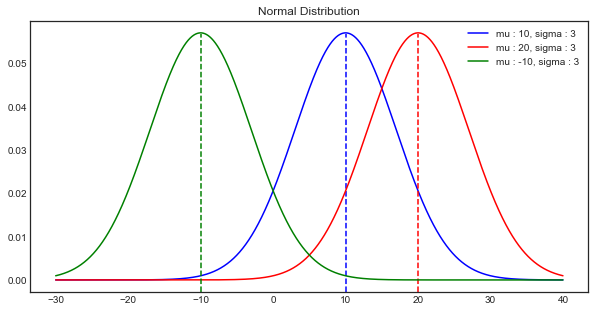

In [13]:
# 평균이 다른 정규분포들
plt.figure(figsize = (10,5))
x = np.arange(-30,40,0.01)

y1 = norm(10,7).pdf(x)
y2 = norm(20,7).pdf(x)
y3 = norm(-10,7).pdf(x)

plt.title('Normal Distribution')
plt.plot(x,y1, 'b', label = 'mu : 10, sigma : 3')
plt.axvline(10, 0, 0.95, color = 'b', linestyle = '--')
plt.plot(x,y2, 'r', label = 'mu : 20, sigma : 3')
plt.axvline(20, 0, 0.95, color = 'r', linestyle = '--')
plt.plot(x,y3, 'g', label = 'mu : -10, sigma : 3')
plt.axvline(-10, 0, 0.95, color ='g', linestyle = '--')
plt.legend()
plt.show()

## 2. 분산 차이별 정규분포 

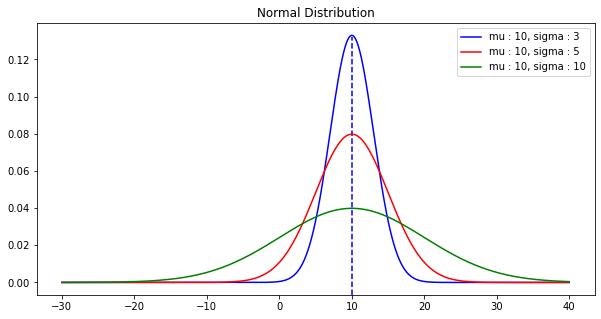

In [108]:
# 표준편차가 다른 정규분포들 
plt.figure(figsize = (10,5))
x = np.arange(-30,40,0.01)

y1 = norm(10,3).pdf(x)
y2 = norm(10,5).pdf(x)
y3 = norm(10,10).pdf(x)

plt.title('Normal Distribution')
plt.plot(x,y1, 'b',label = 'mu : 10, sigma : 3')
plt.axvline(10, 0, 0.95, color = 'b', linestyle = '--')
plt.plot(x,y2, 'r',label = 'mu : 10, sigma : 5')
plt.plot(x,y3, 'g',label = 'mu : 10, sigma : 10')
plt.legend()
plt.show()

## 3. 표준편차 구간

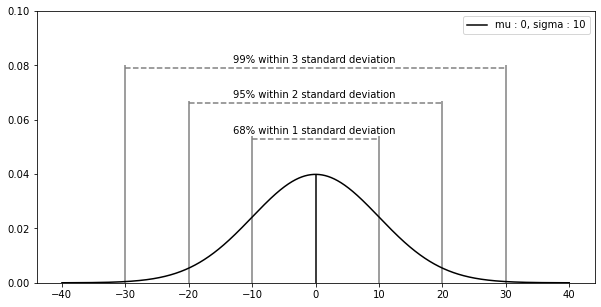

In [107]:
# 1~3 표준편차 구간
plt.figure(figsize = (10, 5))

x = np.arange(-40, 40, 0.01)
y = norm(0,10).pdf(x)

plt.ylim(0,0.1)
for i in range(10,40,10):
    plt.vlines(i, 0,0.041+0.0013*i, color = 'grey')
    plt.vlines(-i,0,0.041+0.0013*i, color = 'grey')
    plt.hlines(0.04+0.0013*i, -i,i, linestyle='--', color='grey')

plt.vlines(0, 0, 0.040, color='black')
plt.text(-13,0.055, '68% within 1 standard deviation')
plt.text(-13,0.068, '95% within 2 standard deviation')
plt.text(-13,0.081, '99% within 3 standard deviation')  
plt.plot(x,y, color= 'black', label='mu : 0, sigma : 10')
plt.legend()
plt.show()

## 4. 표준정규분포

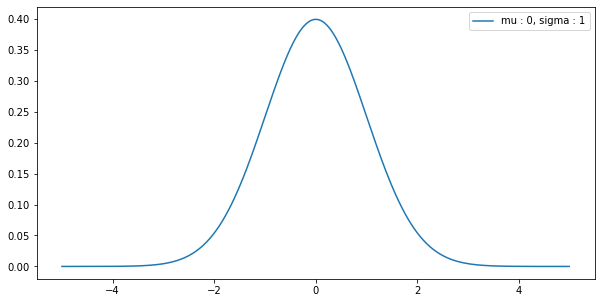

In [110]:
# 표준정규분포
plt.figure(figsize=(10,5))

x= np.arange(-5,5, 0.01)
y= norm(0,1).pdf(x)

plt.plot(x,y, label = 'mu : 0, sigma : 1')
plt.legend()
plt.show()

## 5. 중심극한정리
- 모집단의 분포가 어떠하던 상관없이, 표본의 개수(n)이 충분히 크다면, 모집단에서 뽑은 표본의 평균 $(\bar{X})$의 분포는 정규분포를 따르고 분표의 평균 $(\bar{X})$ 은 모평균 $\mu$ 과 같고 분산$\left(\sigma\right)^2$은 모집단의 분산/샘플의수$\left(\frac{\sigma}{\sqrt{n}}\right)^2$ 라는 것이다. 

$$ \bar{X} \sim N(\mu,  \left(\frac{\sigma}{\sqrt{n}}\right)^2)$$


- 캐글 데이터링크 : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [4]:
data = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [15]:
data[['customerID','MonthlyCharges']].head()

,customerID,MonthlyCharges
0,7590-VHVEG,29.85
1,5575-GNVDE,56.95
2,3668-QPYBK,53.85
3,7795-CFOCW,42.30
4,9237-HQITU,70.70


In [6]:
data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

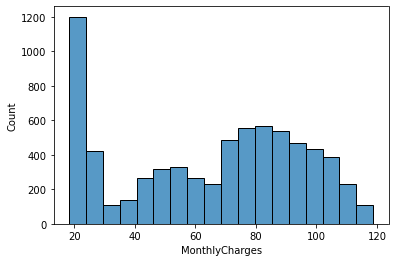

In [7]:
sns.histplot(data['MonthlyCharges'])
plt.show()

### 5-1. 샘플의 개수 4, 반복 횟수 증가에 따른 표본평균의 분포 변화 

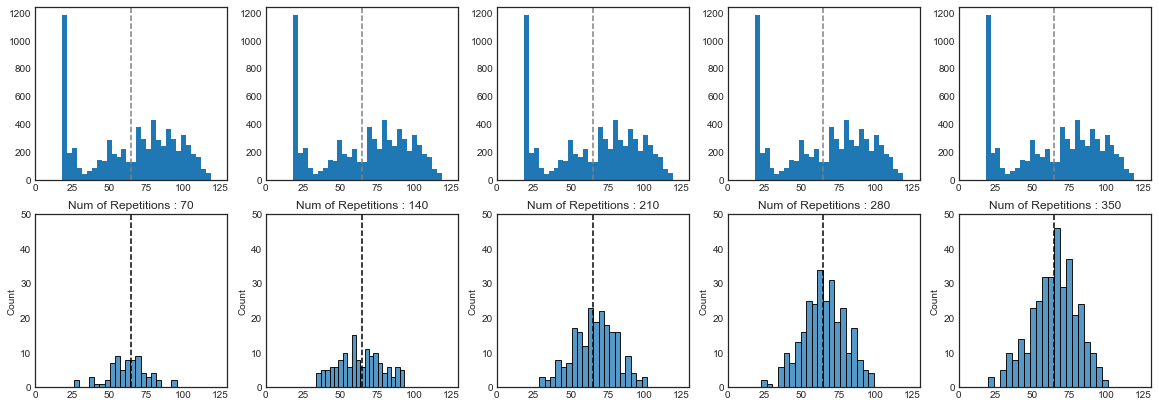

In [14]:
fig, ax = plt.subplots(2,5, figsize=(20,7))

for i in range(10):
    x,y = divmod(i,5)
    if x == 0 : 
        ax[x,y].hist(data['MonthlyCharges'], bins= 30)
        ax[x,y].set_xlim(0,130)

        #sns.histplot(data['MonthlyCharges'], ax=ax[x,y])
        ax[x,y].axvline(data['MonthlyCharges'].mean(),0,1, linestyle='--', color='grey')

        
    else: 
        sample_data =[]
        repetitions_num = 70*(y+1)
        for _ in range(repetitions_num):
            sample_data.append(data['MonthlyCharges'].sample(4, replace=True).mean())
            
            
        sns.histplot(sample_data, ax=ax[x,y], bins=20)
        ax[x,y].axvline(data['MonthlyCharges'].mean(),0,1, linestyle='--', color='black')
        ax[x,y].set_title('Num of Repetitions : {}'.format(repetitions_num))
        ax[x,y].set_xlim(0,130)
        ax[x,y].set_ylim(0,50)

- 샘플을 4개씩 뽑아서 평균을 냈을 때, 분포이다. 
- 분명히 정규분포가 아닌 분포에서 데이터를 뽑아서 평균을 내고 있는데, 
- 반복을 증가하면 할수록 데이터의 중심, 평균에 가까운 데이터의 빈도가 높아진다. 샘플의 평균의 분포가 중심에 가까이 분포한다. 

### 5-2. 샘플수 증가에 따른 표본평균의 분포 변화

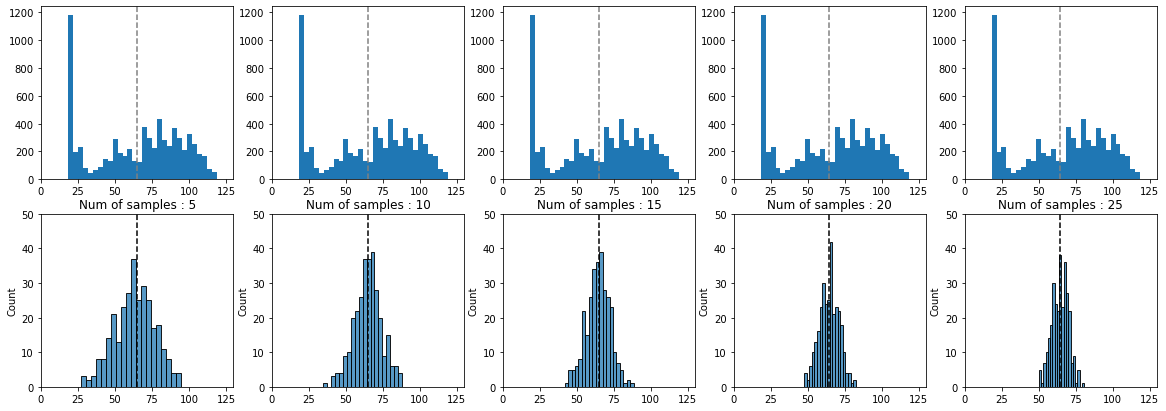

In [10]:
fig, ax = plt.subplots(2,5, figsize=(20,7))

for i in range(10):
    x,y = divmod(i,5)
    if x == 0 : 
        ax[x,y].hist(data['MonthlyCharges'], bins= 30)
        ax[x,y].set_xlim(0,130)

        #sns.histplot(data['MonthlyCharges'], ax=ax[x,y])
        ax[x,y].axvline(data['MonthlyCharges'].mean(),0,1, linestyle='--', color='grey')

        
    else: 
        sample_data =[]
        sample_num = 5*(y+1)
        for _ in range(300):
            sample_data.append(data['MonthlyCharges'].sample(sample_num, replace=True).mean())
            
            
        sns.histplot(sample_data, ax=ax[x,y], bins=20)
        ax[x,y].set_title('Num of samples : {}'.format(sample_num))
        ax[x,y].axvline(data['MonthlyCharges'].mean(),0,1, linestyle='--', color='black')
        ax[x,y].set_xlim(0,130)
        ax[x,y].set_ylim(0,50)